# Actividad 4

In [1]:
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
import Curves2D
import plotly.graph_objects as go

In [2]:
# Parmetros para determinar la curva mediana y errores
nbins=15        # Numero de bins en variable x a usar para dividir la muestra
perc_low=25.        # Percentil a usar como cota inferior de error
perc_high=75.       # Percentil a usar como cota superior de error
min_count=10         # Mínima cantidad de elementos para considerar en un bin

In [3]:
data_folder='/home/ramiro/Facultad/Tesis/Python/Actividad 4/'
data_file='Aperturas_RefL0100N1504_snap_28_aperture_30.dat'
data_path=data_folder+data_file

In [4]:
table=ascii.read(data_path,comment='#',format='fast_csv')
G = 4.30091*10**(-5)  #kpc*(masa solar)^(-1)*(km/s)^2
table['V_200']= np.sqrt(G*table['Group_M_Crit200']/table['Group_R_Crit200'])

**Empiezo haciendo los scater plots**

In [18]:
mask = (table['Stars_Mass']>=1e10)&(table['SF_Oxygen']>0)&(table['SF_Hydrogen']>0)&(table['SF_Mass']>0)&(table['SubGroupNumber']==0)
    
SF_O   = table['SF_Oxygen'][mask]
SF_H   = table['SF_Hydrogen'][mask]
SF_M   = table['SF_Mass'][mask]
M_C_200= table['Group_M_Crit200'][mask]

M_O_SF = SF_O*SF_M
M_H_SF = SF_H*SF_M

xvar   = np.log10(M_C_200)
yvar   = 12 + np.log10(M_O_SF/(16*M_H_SF))

In [19]:
xmin= min(xvar)
xmax= max(xvar)
ymin= min(yvar)
ymax= max(yvar)

In [20]:
# Colors representing some property  
# Define colormap to use
cmap = plt.get_cmap('jet_r')    # Add _r to the name of colormap to invert it.    
cmap.set_under('k')    # Color por debajo de mínimo

# Propiedad a usar para colorear
# Ojo!! Acá depende de la propiedad si tomar o no log10...
colors_var_key='Mass_Star'
colors_var_label=r'$\log(\rm{M}_{Star}(R<30kpc))~[\rm{M}_\odot]$'
colors_var=np.log10(table[colors_var_key][mask])
                                   
#---------------------------------------------------------------
# Esto es en caso de que se tome log y la variable para colorear sea cero
# En estos casos, se asigna el color negro (con el 'set_under' del principio)
mask_color=~(np.logical_or(np.isinf(colors_var),np.isnan(colors_var)))
#---------------------------------------------------------------

# Escaleo los colores "a mano". Es una escala lineal.
vmin=min(colors_var[mask_color])
vmax=max(colors_var[mask_color])
a=1./float(vmax-vmin)
b=-a*vmin
colors=(a*colors_var+b)   # Array de números que representan colores
facecolor=cmap(colors)    # Esto transforma "números" a 4-tuplas que representan colores

<ipython-input-20-97b2596e92b7>:4: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))
  cmap.set_under('k')    # Color por debajo de mínimo


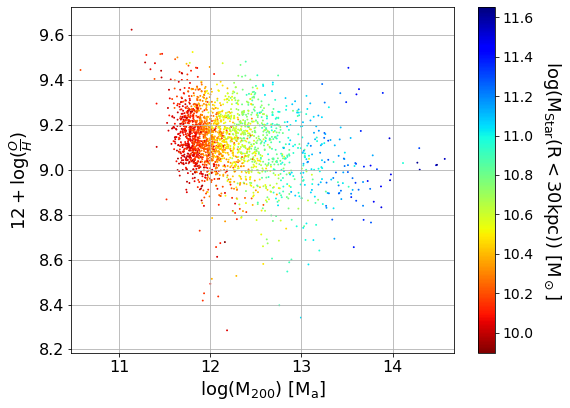

In [21]:
# Gráfico

# Etiquetas y ejes del grafico
fig,ax=plt.subplots(figsize=(8,6))

xlim=(xmin-0.1,xmax+0.1)
ylim=(ymin-0.1,ymax+0.1)

xlabel=r'$\log(\rm{M}_{200}) \ [\rm{M}_{a}]$'
ylabel=r'$12+\log(\frac{O}{H})$'

ax.set_xlabel(xlabel,fontsize=18)
ax.set_ylabel(ylabel,fontsize=18)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=16)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

                        
# Scatter plot 'falso', para armar barra de referencia
sc_bar=ax.scatter(xvar,yvar,c=colors,vmin=vmin,vmax=vmax,cmap=cmap,s=0)
# Agrego barra de referencia para colres
cbar=fig.colorbar(mappable=sc_bar,ax=ax,orientation='vertical')
cbar.set_label(colors_var_label,fontsize=18,rotation=270,labelpad=30)
cbar.ax.tick_params(labelsize=14)

# scatter plot 'posta'
ax.scatter(xvar,yvar,marker='o',s=0.8,c=facecolor)
plt.grid(True)

plt.savefig('scatter_M(200)vsOH.png')
plt.show()

In [22]:
V_200  = table['V_200'][mask]
xvar   = np.log10(V_200)
yvar   = 12 + np.log10(M_O_SF/(16*M_H_SF))

In [23]:
xmin= min(xvar)
xmax= max(xvar)
ymin= min(yvar)
ymax= max(yvar)

In [24]:
# Colors representing some property  
# Define colormap to use
cmap = plt.get_cmap('jet_r')    # Add _r to the name of colormap to invert it.    
cmap.set_under('k')    # Color por debajo de mínimo

# Propiedad a usar para colorear
# Ojo!! Acá depende de la propiedad si tomar o no log10...
colors_var_key='Mass_Star'
colors_var_label=r'$\log(\rm{M}_{Star}(R<30kpc))~[\rm{M}_\odot]$'
colors_var=np.log10(table[colors_var_key][mask])
                                   
#---------------------------------------------------------------
# Esto es en caso de que se tome log y la variable para colorear sea cero
# En estos casos, se asigna el color negro (con el 'set_under' del principio)
mask_color=~(np.logical_or(np.isinf(colors_var),np.isnan(colors_var)))
#---------------------------------------------------------------

# Escaleo los colores "a mano". Es una escala lineal.
vmin=min(colors_var[mask_color])
vmax=max(colors_var[mask_color])
a=1./float(vmax-vmin)
b=-a*vmin
colors=(a*colors_var+b)   # Array de números que representan colores
facecolor=cmap(colors)    # Esto transforma "números" a 4-tuplas que representan colores

<ipython-input-24-97b2596e92b7>:4: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))
  cmap.set_under('k')    # Color por debajo de mínimo


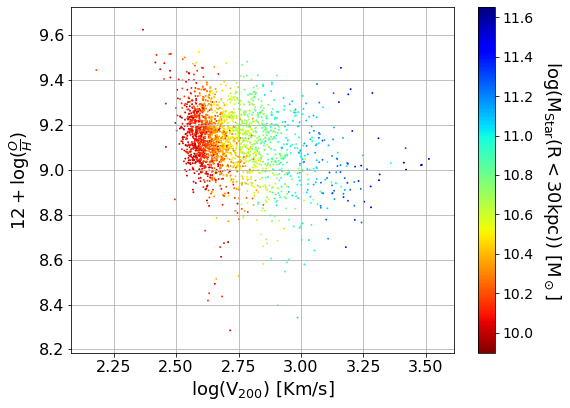

In [25]:
# Gráfico

# Etiquetas y ejes del grafico
fig,ax=plt.subplots(figsize=(8,6))

xlim=(xmin-0.1,xmax+0.1)
ylim=(ymin-0.1,ymax+0.1)

xlabel=r'$\log(\rm{V}_{200}) \ [\rm{Km}/{s}]$'
ylabel=r'$12+\log(\frac{O}{H})$'

ax.set_xlabel(xlabel,fontsize=18)
ax.set_ylabel(ylabel,fontsize=18)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=16)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

                        
# Scatter plot 'falso', para armar barra de referencia
sc_bar=ax.scatter(xvar,yvar,c=colors,vmin=vmin,vmax=vmax,cmap=cmap,s=0)
# Agrego barra de referencia para colres
cbar=fig.colorbar(mappable=sc_bar,ax=ax,orientation='vertical')
cbar.set_label(colors_var_label,fontsize=18,rotation=270,labelpad=30)
cbar.ax.tick_params(labelsize=14)

# scatter plot 'posta'
ax.scatter(xvar,yvar,marker='o',s=0.8,c=facecolor)
plt.grid(True)

plt.savefig('scatter_V(200)vsOH.png')
plt.show()

In [26]:
M_30   = table['Mass_Star'][mask]
xvar   = np.log10(M_30)
yvar   = 12 + np.log10(M_O_SF/(16*M_H_SF))

In [27]:
xmin= min(xvar)
xmax= max(xvar)
ymin= min(yvar)
ymax= max(yvar)

In [28]:
# Colors representing some property  
# Define colormap to use
cmap = plt.get_cmap('jet_r')    # Add _r to the name of colormap to invert it.    
cmap.set_under('k')    # Color por debajo de mínimo

# Propiedad a usar para colorear
# Ojo!! Acá depende de la propiedad si tomar o no log10...
colors_var_key='Group_M_Crit200'
colors_var_label=r'$\log(\rm{M}_{200}) \ [\rm{M}_{a}]$'
colors_var=np.log10(table[colors_var_key][mask])
                                   
#---------------------------------------------------------------
# Esto es en caso de que se tome log y la variable para colorear sea cero
# En estos casos, se asigna el color negro (con el 'set_under' del principio)
mask_color=~(np.logical_or(np.isinf(colors_var),np.isnan(colors_var)))
#---------------------------------------------------------------

# Escaleo los colores "a mano". Es una escala lineal.
vmin=min(colors_var[mask_color])
vmax=max(colors_var[mask_color])
a=1./float(vmax-vmin)
b=-a*vmin
colors=(a*colors_var+b)   # Array de números que representan colores
facecolor=cmap(colors)    # Esto transforma "números" a 4-tuplas que representan colores

<ipython-input-28-5cbbceb2fc1c>:4: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))
  cmap.set_under('k')    # Color por debajo de mínimo


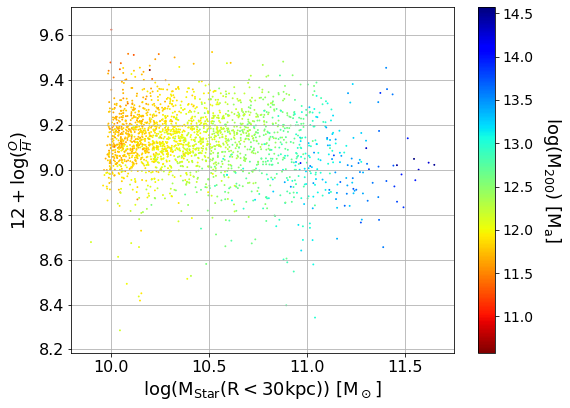

In [29]:
# Gráfico

# Etiquetas y ejes del grafico
fig,ax=plt.subplots(figsize=(8,6))

xlim=(xmin-0.1,xmax+0.1)
ylim=(ymin-0.1,ymax+0.1)

xlabel=r'$\log(\rm{M}_{Star}(R<30kpc))~[\rm{M}_\odot]$'
ylabel=r'$12+\log(\frac{O}{H})$'

ax.set_xlabel(xlabel,fontsize=18)
ax.set_ylabel(ylabel,fontsize=18)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=16)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

                        
# Scatter plot 'falso', para armar barra de referencia
sc_bar=ax.scatter(xvar,yvar,c=colors,vmin=vmin,vmax=vmax,cmap=cmap,s=0)
# Agrego barra de referencia para colres
cbar=fig.colorbar(mappable=sc_bar,ax=ax,orientation='vertical')
cbar.set_label(colors_var_label,fontsize=18,rotation=270,labelpad=30)
cbar.ax.tick_params(labelsize=14)

# scatter plot 'posta'
ax.scatter(xvar,yvar,marker='o',s=0.8,c=facecolor)
plt.grid(True)

plt.savefig('scatter_M(R<200)vsOH.png')
plt.show()

**Plots de medianas y percentiles 25 y 75**

In [30]:
xvar   = np.log10(M_C_200)
yvar   = 12 + np.log10(M_O_SF/(16*M_H_SF))

In [31]:
xmin= min(xvar)
xmax= max(xvar)
ymin= min(yvar)
ymax= max(yvar)

In [32]:
# Parmetros para determinar la curva mediana y errores
nbins=10        # Numero de bins en variable x a usar para dividir la muestra
perc_low=25.        # Percentil a usar como cota inferior de error
perc_high=75.       # Percentil a usar como cota superior de error
min_count=10         # Mínima cantidad de elementos para considerar en un bin

xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xvar,yvar,bins=nbins,min_count=min_count,
                                                             perc_low=perc_low,perc_high=perc_high)

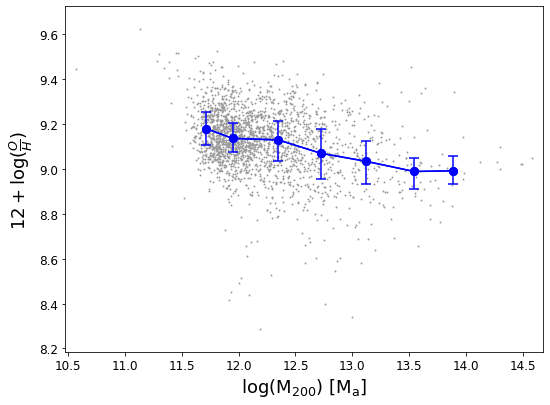

In [33]:
# Gráfico

# Etiquetas y ejes del grafico
fig,ax=plt.subplots(figsize=(8,6))

xlim=(xmin-0.1,xmax+0.1)
ylim=(ymin-0.1,ymax+0.1)

xlabel=r'$\log(\rm{M}_{200}) \ [\rm{M}_{a}]$'
ylabel=r'$12+\log(\frac{O}{H})$'

ax.set_xlabel(xlabel,fontsize=18)
ax.set_ylabel(ylabel,fontsize=18)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=12)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

# scatter plot
ax.scatter(xvar,yvar,marker='o',s=0.8,c='0.6',label='Scatter plot')

#----------------------------------------------------------------------------------------------------
# Curva mediana simple con marcadores

ax.plot(xmedian,ymedian,c='b',marker='o',ms=8,linestyle='-',linewidth=1.5,label='Median relation')

#----------------------------------------------------------------------------------------------------
# Curva mediana con barras de error y marcadores

ax.errorbar(xmedian,ymedian,yerr=yerror,
            c='b',marker='o',markersize=8,linestyle='-',
            linewidth=1.5,label='Median relation',capsize=5,capthick=1.5)
            

#plt.savefig('median_M(200)vsOH.png')

plt.show()

In [34]:
V_200  = table['V_200'][mask]
xvar   = np.log10(V_200)
yvar   = 12 + np.log10(M_O_SF/(16*M_H_SF))

In [35]:
xmin= min(xvar)
xmax= max(xvar)
ymin= min(yvar)
ymax= max(yvar)

In [36]:
# Parmetros para determinar la curva mediana y errores
nbins=10        # Numero de bins en variable x a usar para dividir la muestra
perc_low=25.        # Percentil a usar como cota inferior de error
perc_high=75.       # Percentil a usar como cota superior de error
min_count=10         # Mínima cantidad de elementos para considerar en un bin

xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xvar,yvar,bins=nbins,min_count=min_count,
                                                             perc_low=perc_low,perc_high=perc_high)

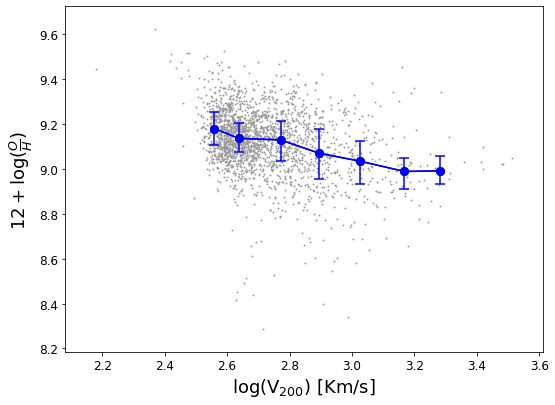

In [37]:
# Gráfico

# Etiquetas y ejes del grafico
fig,ax=plt.subplots(figsize=(8,6))

xlim=(xmin-0.1,xmax+0.1)
ylim=(ymin-0.1,ymax+0.1)

xlabel=r'$\log(\rm{V}_{200}) \ [\rm{Km}/{s}]$'
ylabel=r'$12+\log(\frac{O}{H})$'

ax.set_xlabel(xlabel,fontsize=18)
ax.set_ylabel(ylabel,fontsize=18)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=12)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

# scatter plot
ax.scatter(xvar,yvar,marker='o',s=0.8,c='0.6',label='Scatter plot')

#----------------------------------------------------------------------------------------------------
# Curva mediana simple con marcadores

ax.plot(xmedian,ymedian,c='b',marker='o',ms=8,linestyle='-',linewidth=1.5,label='Median relation')

#----------------------------------------------------------------------------------------------------
# Curva mediana con barras de error y marcadores

ax.errorbar(xmedian,ymedian,yerr=yerror,
            c='b',marker='o',markersize=8,linestyle='-',
            linewidth=1.5,label='Median relation',capsize=5,capthick=1.5)
            

plt.savefig('median_V(200)vsOH.png')
plt.show()

In [38]:
M_30   = table['Mass_Star'][mask]
xvar   = np.log10(M_30)
yvar   = 12 + np.log10(M_O_SF/(16*M_H_SF))

In [39]:
xmin= min(xvar)
xmax= max(xvar)
ymin= min(yvar)
ymax= max(yvar)

In [40]:
# Parmetros para determinar la curva mediana y errores
nbins=10        # Numero de bins en variable x a usar para dividir la muestra
perc_low=25.        # Percentil a usar como cota inferior de error
perc_high=75.       # Percentil a usar como cota superior de error
min_count=10         # Mínima cantidad de elementos para considerar en un bin

xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xvar,yvar,bins=nbins,min_count=min_count,
                                                             perc_low=perc_low,perc_high=perc_high)

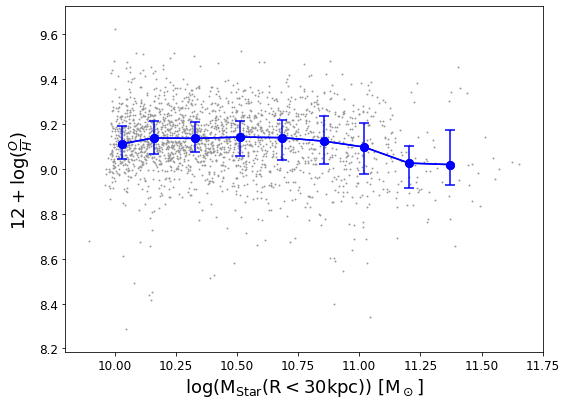

In [41]:
# Gráfico

# Etiquetas y ejes del grafico
fig,ax=plt.subplots(figsize=(8,6))

xlim=(xmin-0.1,xmax+0.1)
ylim=(ymin-0.1,ymax+0.1)

xlabel=r'$\log(\rm{M}_{Star}(R<30kpc))~[\rm{M}_\odot]$'
ylabel=r'$12+\log(\frac{O}{H})$'

ax.set_xlabel(xlabel,fontsize=18)
ax.set_ylabel(ylabel,fontsize=18)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=12)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

# scatter plot
ax.scatter(xvar,yvar,marker='o',s=0.8,c='0.6',label='Scatter plot')

#----------------------------------------------------------------------------------------------------
# Curva mediana simple con marcadores

ax.plot(xmedian,ymedian,c='b',marker='o',ms=8,linestyle='-',linewidth=1.5,label='Median relation')

#----------------------------------------------------------------------------------------------------
# Curva mediana con barras de error y marcadores

ax.errorbar(xmedian,ymedian,yerr=yerror,
            c='b',marker='o',markersize=8,linestyle='-',
            linewidth=1.5,label='Median relation',capsize=5,capthick=1.5)
            

plt.savefig('median_M(R<30)vsOH.png')

plt.show()

**Caracterización del entorno de una galaxia masiva:**

In [5]:
Gal_Max = max(table['Stars_Mass'])
print('La galaxia con mayor masa estelar tiene Log(Gal_Max)='+str(round(np.log10(Gal_Max),2))+' masas solares.')

La galaxia con mayor masa estelar tiene Log(Gal_Max)=12.28 masas solares.


Busquemos a que familia de cúmulo pertenece:

In [6]:
mask_Max = (table['Stars_Mass']>=Gal_Max)
Group_Max  = table['GroupID'][mask_Max]
x_max = table['CentreOfPotential_x'][mask_Max]
y_max = table['CentreOfPotential_y'][mask_Max]
z_max = table['CentreOfPotential_z'][mask_Max]

Hacemos un gráfico con la familia de galáxias que contiene a la de mayor masa en los planos xy,yz y xz: 

In [103]:
eje_1 = 'x'
eje_2 = 'y'
eje_3 = 'z'

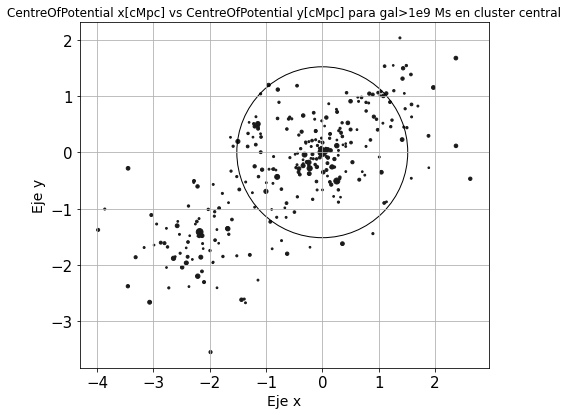

In [104]:
fig,ax=plt.subplots(figsize=(8,6))

mask = (table['GroupID']==Group_Max)&(table['Stars_Mass']>=1e9)

xvar= table['CentreOfPotential_'+eje_1][mask]-x_max
yvar= table['CentreOfPotential_'+eje_2][mask]-y_max

sizes=np.exp((np.log10(table['Stars_Mass'][mask])))/3000

ax.scatter(xvar,yvar,marker='o',s=sizes,c='0.1',label='Scatter plot a z=0')

xlim=(min(xvar)-0.1,max(xvar)+0.1)
ylim=(min(yvar)-0.1,max(yvar)+0.1)

xlabel= 'Eje '+eje_1
ylabel= 'Eje '+eje_2

ax.set_xlabel(xlabel,fontsize=14)
ax.set_ylabel(ylabel,fontsize=14)

ax.tick_params(axis='both',labelsize=15)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.title('CentreOfPotential '+eje_1+'[cMpc] vs CentreOfPotential '+eje_2+'[cMpc] para gal>1e9 Ms en cluster central')

plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

#leg = plt.legend(loc='upper right',edgecolor='w',fontsize=10)
#leg.set_title('EAGLE RefL0100N1504', prop = {'size':15})

radius=table['Group_R_Crit200'][mask_Max]/1000

cc=plt.Circle((0,0),radius,fill=False)

ax.add_artist(cc)

plt.axis('scaled')#Escalea los ejes para que no se deforme el plano

plt.grid(True)
plt.savefig('CentreOfPotential_y_vs_CentreOfPotential_x_(z=0).png')
plt.show()

In [108]:
radius

1.51819189453125


In [106]:
eje_1 = 'x'
eje_2 = 'z'
eje_3 = 'y'

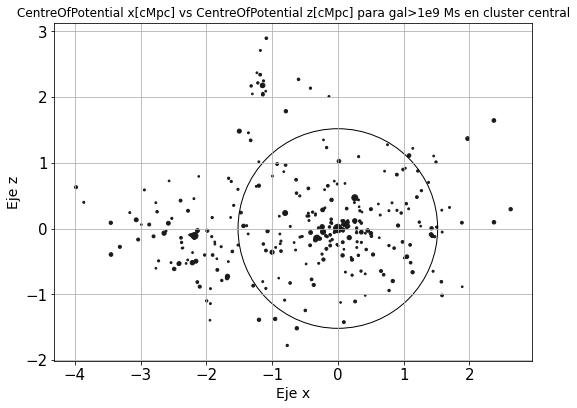

In [107]:
fig,ax=plt.subplots(figsize=(8,6))

mask = (table['GroupID']==Group_Max)&(table['Stars_Mass']>=1e9)

xvar= table['CentreOfPotential_'+eje_1][mask]-x_max
yvar= table['CentreOfPotential_'+eje_2][mask]-z_max

sizes=np.exp((np.log10(table['Stars_Mass'][mask])))/3000

ax.scatter(xvar,yvar,marker='o',s=sizes,c='0.1',label=None)

xlim=(min(xvar)-0.1,max(xvar)+0.1)
ylim=(min(yvar)-0.1,max(yvar)+0.1)

xlabel= 'Eje '+eje_1
ylabel= 'Eje '+eje_2

ax.set_xlabel(xlabel,fontsize=14)
ax.set_ylabel(ylabel,fontsize=14)

ax.tick_params(axis='both',labelsize=15)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.title('CentreOfPotential '+eje_1+'[cMpc] vs CentreOfPotential '+eje_2+'[cMpc] para gal>1e9 Ms en cluster central')

plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

#leg = plt.legend(loc='upper right',edgecolor='w',fontsize=10)
#leg.set_title('Group R Crit200', prop = {'size':15})

radius=table['Group_R_Crit200'][mask_Max]/1000
cc=plt.Circle((0,0),radius,fill=False)

ax.add_artist(cc)

plt.axis('scaled')#Escalea los ejes para que no se deforme el plano

plt.grid(True)
plt.savefig('CentreOfPotential_z_vs_CentreOfPotential_x_(z=0).png')
plt.show()

In [93]:
eje_1 = 'y'
eje_2 = 'z'
eje_3 = 'x'

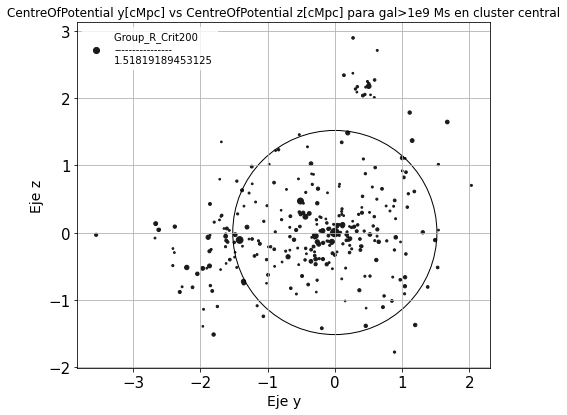

In [100]:
fig,ax=plt.subplots(figsize=(8,6))

mask = (table['GroupID']==Group_Max)&(table['Stars_Mass']>=1e9)

xvar= table['CentreOfPotential_'+eje_1][mask]-y_max
yvar= table['CentreOfPotential_'+eje_2][mask]-z_max

sizes=np.exp((np.log10(table['Stars_Mass'][mask])))/3000

radius= table['Group_R_Crit200'][mask_Max]/1000

ax.scatter(xvar,yvar,marker='o',s=sizes,c='0.1',label=str(radius))

xlim=(min(xvar)-1,max(xvar)+1)
ylim=(min(yvar)-1,max(yvar)+1)

xlabel= 'Eje '+eje_1
ylabel= 'Eje '+eje_2

ax.set_xlabel(xlabel,fontsize=14)
ax.set_ylabel(ylabel,fontsize=14)

ax.tick_params(axis='both',labelsize=15)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.title('CentreOfPotential '+eje_1+'[cMpc] vs CentreOfPotential '+eje_2+'[cMpc] para gal>1e9 Ms en cluster central')

plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

#leg = plt.legend(loc='upper left',edgecolor='w',fontsize=10)
#leg.set_title('EAGLE RefL0100N1504', prop = {'size':15})

radius=table['Group_R_Crit200'][mask_Max]/1000

cc=plt.Circle((0,0),radius,fill=False)

ax.add_artist(cc)

plt.axis('scaled')#Escalea los ejes para que no se deforme el plano

plt.grid(True)
#plt.savefig('CentreOfPotential_z_vs_CentreOfPotential_y_(z=0).png')
plt.show()

In [149]:
eje_1 = 'x'
eje_2 = 'y'
eje_3 = 'z'

In [151]:
mask = (table['GroupID']==Group_Max)&(table['Stars_Mass']>=1e9)&(table['SF_Oxygen']>0)&(table['SF_Hydrogen']>0)&(table['SF_Mass']>0)

mask_null_O =(table['GroupID']==Group_Max)&(table['Stars_Mass']>=1e9)&(table['SF_Oxygen']==0)
mask_null_H =(table['GroupID']==Group_Max)&(table['Stars_Mass']>=1e9)&(table['SF_Hydrogen']>0)

SF_O   = table['SF_Oxygen'][mask]
SF_H   = table['SF_Hydrogen'][mask]
SF_M   = table['SF_Mass'][mask]
M_C_200= table['Group_M_Crit200'][mask]

M_O_SF = SF_O*SF_M
M_H_SF = SF_H*SF_M

metal_var = 12 + np.log10(M_O_SF/(16*M_H_SF))

size   = np.exp((np.log10(table['Stars_Mass'][mask])))/12000
size_O = np.exp((np.log10(table['Stars_Mass'][mask_null_O])))/12000

sizemin = min(size)

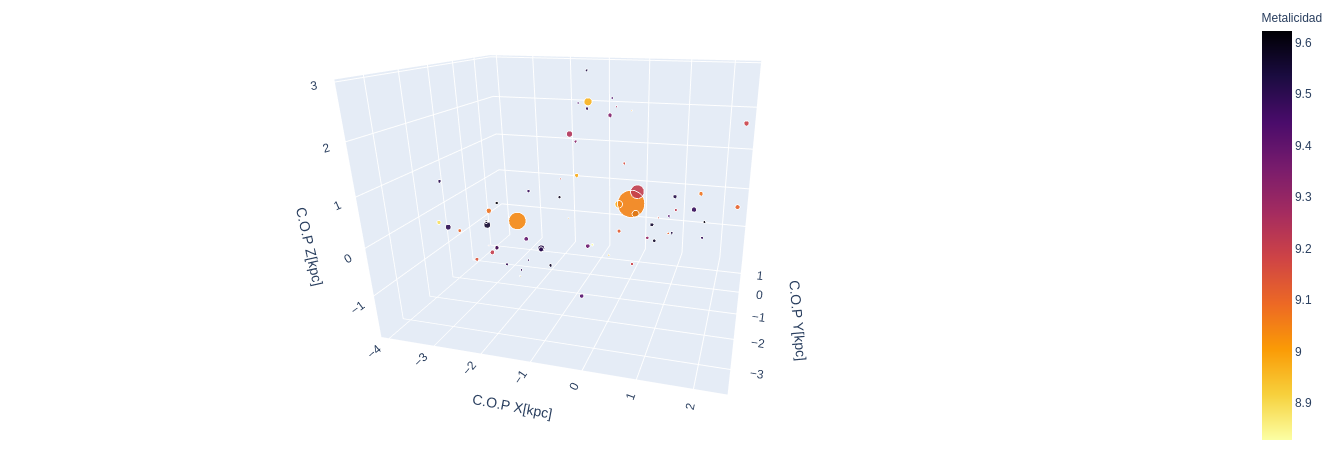

In [152]:
xvar= table['CentreOfPotential_x'][mask]-x_max
yvar= table['CentreOfPotential_y'][mask]-y_max
zvar= table['CentreOfPotential_z'][mask]-z_max

xvar_O= table['CentreOfPotential_x'][mask_null_O]-x_max
yvar_O= table['CentreOfPotential_y'][mask_null_O]-y_max
zvar_O= table['CentreOfPotential_z'][mask_null_O]-z_max

cmin = min(metal_var)
cmax = max(metal_var)


fig = go.Figure(data=[go.Scatter3d(
    x=xvar,
    y=yvar,
    z=zvar,
    mode='markers',
    marker=dict(
        sizemin=sizemin,
        size=size,
        cauto=False,
        cmin=cmin,
        cmax=cmax,
        showscale=True,
        color=metal_var,        # set color to an array/list of desired values
        colorscale='inferno',   # choose a colorscale
        opacity=0.9,
        reversescale=True,
        colorbar=dict(title='Metalicidad')
    ))])

# tight layout
fig.update_layout(scene = dict(
                    xaxis_title='C.O.P X[Mpc]',
                    yaxis_title='C.O.P Y[Mpc]',
                    zaxis_title='C.O.P Z[Mpc]'),
                    width=700,
                  margin =dict(l=0, r=0, b=0, t=0))

fig.show()


In [133]:
mask = (table['GroupID']==Group_Max)&(table['Stars_Mass']>=Gal_Max)&(table['SF_Oxygen']>0)&(table['SF_Hydrogen']>0)&(table['SF_Mass']>0)

xvar= table['CentreOfPotential_x'][mask]
yvar= table['CentreOfPotential_y'][mask]
zvar= table['CentreOfPotential_z'][mask]
print(xvar)
print(yvar)
print(zvar)

CentreOfPotential_x
-------------------
  5.563246250152588
CentreOfPotential_y
-------------------
  75.68730163574219
CentreOfPotential_z
-------------------
  47.83339309692383


In [173]:
eje_1 = 'x'
eje_2 = 'y'
eje_3 = 'z'

In [174]:
mask = (table['Stars_Mass']>=1e10)&(table['SF_Oxygen']>0)&(table['SF_Hydrogen']>0)&(table['SF_Mass']>0)#&(table['SubGroupNumber']==0)
    
SF_O   = table['SF_Oxygen'][mask]
SF_H   = table['SF_Hydrogen'][mask]
SF_M   = table['SF_Mass'][mask]
M_C_200= table['Group_M_Crit200'][mask]

M_O_SF = SF_O*SF_M
M_H_SF = SF_H*SF_M

metal_var = 12 + np.log10(M_O_SF/(16*M_H_SF))

size = (3)**(np.log((table['Stars_Mass'][mask]))/np.log(max((table['Stars_Mass'][mask]))))
sizemin = min(size)


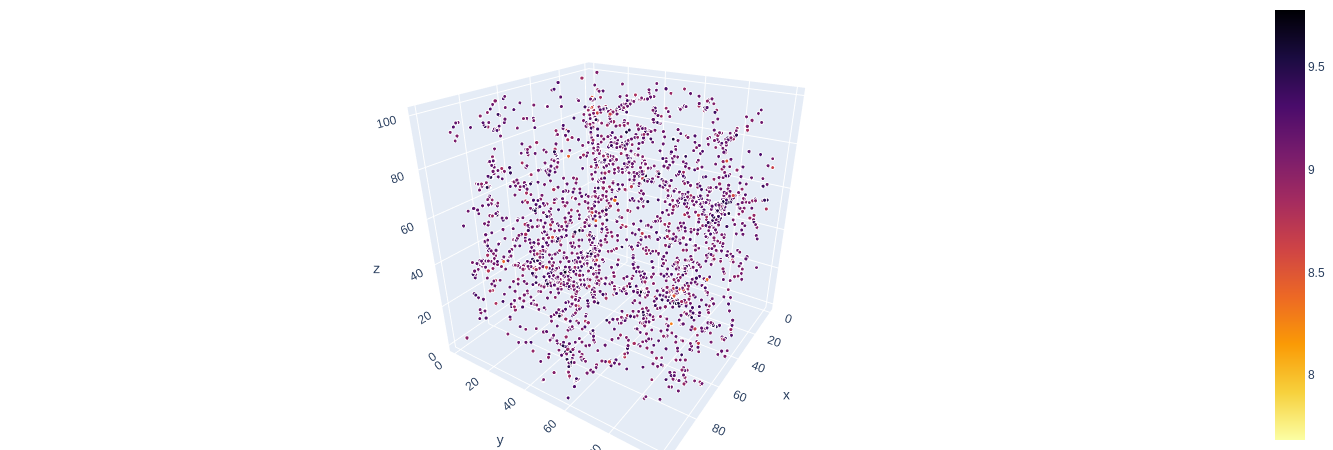

In [136]:
xvar = table['CentreOfPotential_'+eje_1][mask]
yvar = table['CentreOfPotential_'+eje_2][mask]
zvar = table['CentreOfPotential_'+eje_3][mask]

cmin = min(metal_var)
cmax = max(metal_var)

fig = go.Figure(data=[go.Scatter3d(
    x=xvar,
    y=yvar,
    z=zvar,
    mode='markers',
    marker=dict(
        sizemin=sizemin,
        size=size,
        cauto=True,
        cmin=cmin,
        cmax=cmax,
        showscale=True,
        color=metal_var,            # set color to an array/list of desired values
        colorscale='inferno',   # choose a colorscale
        opacity=1,
        reversescale=True
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()


In [76]:
print(cmin)

0.8143520084364897


**Cálculo de la distancia entre la galáxia central con las galáxias satélites, para la galáxia más masiva de la simulación**

In [83]:
Gal_Max     = max(table['Stars_Mass'])

In [84]:
mask_Max   = (table['Stars_Mass']>=Gal_Max)
Group_Max  = table['GroupID'][mask_Max]
mask_Group = (table['GroupID']==Group_Max)

**Hacemos una tabla que contenga la información de las distancias, pero primero ubicamos la posición de la galáxia central:**

In [85]:
xmax = table['CentreOfPotential_x'][mask_Max]
ymax = table['CentreOfPotential_y'][mask_Max]
zmax = table['CentreOfPotential_z'][mask_Max]

In [86]:
Distancias_Group  =  np.sqrt(  (table['CentreOfPotential_x'][mask_Group]-xmax*np.ones_like(table['CentreOfPotential_x'][mask_Group]))**2
                              +(table['CentreOfPotential_y'][mask_Group]-ymax*np.ones_like(table['CentreOfPotential_y'][mask_Group]))**2
                              +(table['CentreOfPotential_z'][mask_Group]-zmax*np.ones_like(table['CentreOfPotential_z'][mask_Group]))**2 )

In [87]:
Masas_Group = table['Stars_Mass'][mask_Group]

In [88]:
xvar = Distancias_Group
yvar = Masas_Group/Gal_Max

In [89]:
xmin= min(xvar)
xmax= max(xvar)
ymin= min(yvar)
ymax= max(yvar)

In [90]:
# Parmetros para determinar la curva mediana y errores
nbins=10        # Numero de bins en variable x a usar para dividir la muestra
perc_low=25.        # Percentil a usar como cota inferior de error
perc_high=75.       # Percentil a usar como cota superior de error
min_count=10         # Mínima cantidad de elementos para considerar en un bin

xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xvar,yvar,bins=nbins,min_count=min_count,
                                                             perc_low=perc_low,perc_high=perc_high)

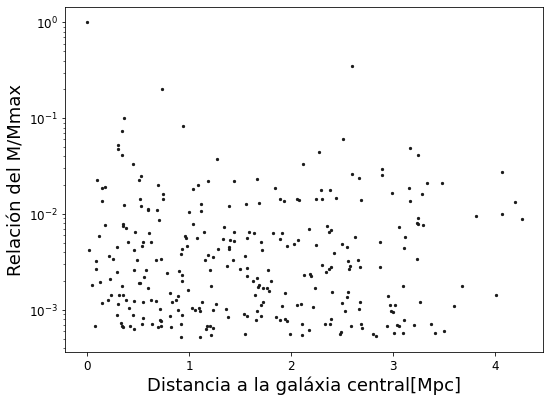

In [92]:
# Gráfico

# Etiquetas y ejes del grafico
fig,ax=plt.subplots(figsize=(8,6))

xlim=(xmin-0.01,xmax+0.01)
ylim=(ymin-0.01,ymax+0.01)

xlabel=r'Distancia a la galáxia central[Mpc]'
ylabel=r'Relación del M/Mmax'

ax.set_xlabel(xlabel,fontsize=18)
ax.set_ylabel(ylabel,fontsize=18)

#ax.set_xlim(xlim)
#ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=12)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

ax.set_yscale('log')

# scatter plot
ax.scatter(xvar,yvar,marker='o',s=5,c='0.1',label='Scatter plot')

#----------------------------------------------------------------------------------------------------
# Curva mediana simple con marcadores

#ax.plot(xmedian,ymedian,c='b',marker='o',ms=8,linestyle='-',linewidth=1.5,label='Median relation')

#----------------------------------------------------------------------------------------------------
# Curva mediana con barras de error y marcadores

#ax.errorbar(xmedian,ymedian,yerr=yerror,
#            c='b',marker='o',markersize=8,linestyle='-',
#            linewidth=1.5,label='Median relation',capsize=5,capthick=1.5)
            

plt.savefig('scatter_distancias_masas.png')

plt.show()

# Scatter para galáxias con colores para indicar la metalicidad

**Pensar en opciones para graficar las galáxias que hacen que la metaliciadad diverja**

In [28]:
mask = (table['GroupID']==Group_Max)&(table['Stars_Mass']>=1e9)&(table['SF_Oxygen']>0)&(table['SF_Hydrogen']>0)&(table['SF_Mass']>0)
    
SF_O   = table['SF_Oxygen'][mask]
SF_H   = table['SF_Hydrogen'][mask]
SF_M   = table['SF_Mass'][mask]
M_C_200= table['Group_M_Crit200'][mask]

M_O_SF = SF_O*SF_M
M_H_SF = SF_H*SF_M

metal_var = 12 + np.log10(M_O_SF/(16*M_H_SF))

In [29]:
eje_1 = 'x'
eje_2 = 'y'
eje_3 = 'z'

In [30]:
xvar= table['CentreOfPotential_'+eje_1][mask]-x_max
yvar= table['CentreOfPotential_'+eje_2][mask]-y_max

In [31]:
xmin= min(xvar)
xmax= max(xvar)
ymin= min(yvar)
ymax= max(yvar)

In [38]:
# Colors representing some property  
# Define colormap to use
cmap = plt.get_cmap('jet_r')    # Add _r to the name of colormap to invert it.    
cmap.set_under('k')    # Color por debajo de mínimo

# Propiedad a usar para colorear
# Ojo!! Acá depende de la propiedad si tomar o no log10...
colors_var_key = metal_var
colors_var_label=r'$12+\log(\frac{O}{H})$'
colors_var = colors_var_key
                                   
#---------------------------------------------------------------
# Esto es en caso de que se tome log y la variable para colorear sea cero
# En estos casos, se asigna el color negro (con el 'set_under' del principio)
mask_color=~(np.logical_or(np.isinf(colors_var),np.isnan(colors_var)))
#---------------------------------------------------------------

# Escaleo los colores "a mano". Es una escala lineal.
vmin=min(colors_var[mask_color])
vmax=max(colors_var[mask_color])
a=1./float(vmax-vmin)
b=-a*vmin
colors=(a*colors_var+b)  # Array de números que representan colores
facecolor=cmap(colors)    # Esto transforma "números" a 4-tuplas que representan colores

<ipython-input-38-e03718db43dd>:4: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))
  cmap.set_under('k')    # Color por debajo de mínimo


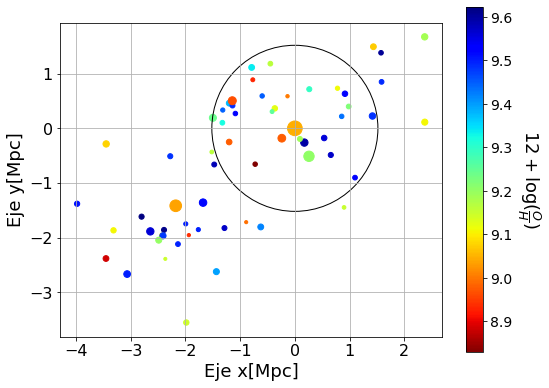

In [39]:
# Gráfico

# Etiquetas y ejes del grafico
fig,ax=plt.subplots(figsize=(8,6))

xlim=(xmin-0.1,xmax+0.1)
ylim=(ymin-0.1,ymax+0.1)

xlabel= 'Eje '+eje_1+'[Mpc]'
ylabel= 'Eje '+eje_2+'[Mpc]'

sizes=np.exp((np.log10(table['Stars_Mass'][mask])))/1000

ax.set_xlabel(xlabel,fontsize=18)
ax.set_ylabel(ylabel,fontsize=18)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=16)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

# Scatter plot 'falso', para armar barra de referencia
sc_bar=ax.scatter(xvar,yvar,c=colors,vmin=vmin,vmax=vmax,cmap=cmap,s=0)
# Agrego barra de referencia para colres
cbar=fig.colorbar(mappable=sc_bar,ax=ax,orientation='vertical')
cbar.set_label(colors_var_label,fontsize=18,rotation=270,labelpad=30)
cbar.ax.tick_params(labelsize=14)

# scatter plot 'posta'
ax.scatter(xvar,yvar,marker='o',s=sizes,c=facecolor)
plt.grid(True)

radius=table['Group_R_Crit200'][mask_Max]/1000

cc=plt.Circle((0,0),radius,fill=False)

ax.add_artist(cc)

plt.axis('scaled')#Escalea los ejes para que no se deforme el plano

plt.savefig('scatter_posicionesxy_con_grad.png')
plt.show()

In [18]:
mask = (table['GroupID']==Group_Max)&(table['Stars_Mass']>=1e9)&(table['SF_Oxygen']>0)&(table['SF_Hydrogen']>0)&(table['SF_Mass']>0)
    
SF_O   = table['SF_Oxygen'][mask]
SF_H   = table['SF_Hydrogen'][mask]
SF_M   = table['SF_Mass'][mask]
M_C_200= table['Group_M_Crit200'][mask]

M_O_SF = SF_O*SF_M
M_H_SF = SF_H*SF_M

metal_var = 12 + np.log10(M_O_SF/(16*M_H_SF))

In [33]:
eje_1 = 'x'
eje_2 = 'z'
eje_3 = 'y'

In [34]:
xvar= table['CentreOfPotential_'+eje_1][mask]-x_max
yvar= table['CentreOfPotential_'+eje_2][mask]-z_max

In [35]:
xmin= min(xvar)
xmax= max(xvar)
ymin= min(yvar)
ymax= max(yvar)

In [36]:
# Colors representing some property  
# Define colormap to use
cmap = plt.get_cmap('jet_r')    # Add _r to the name of colormap to invert it.    
cmap.set_under('k')    # Color por debajo de mínimo

# Propiedad a usar para colorear
# Ojo!! Acá depende de la propiedad si tomar o no log10...
colors_var_key = metal_var
colors_var_label=r'$12+\log(\frac{O}{H})$'
colors_var = colors_var_key
                                   
#---------------------------------------------------------------
# Esto es en caso de que se tome log y la variable para colorear sea cero
# En estos casos, se asigna el color negro (con el 'set_under' del principio)
mask_color=~(np.logical_or(np.isinf(colors_var),np.isnan(colors_var)))
#---------------------------------------------------------------

# Escaleo los colores "a mano". Es una escala lineal.
vmin=min(colors_var[mask_color])
vmax=max(colors_var[mask_color])
a=1./float(vmax-vmin)
b=-a*vmin
colors=(a*colors_var+b)   # Array de números que representan colores
facecolor=cmap(colors)    # Esto transforma "números" a 4-tuplas que representan colores

<ipython-input-36-615c108029ff>:4: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))
  cmap.set_under('k')    # Color por debajo de mínimo


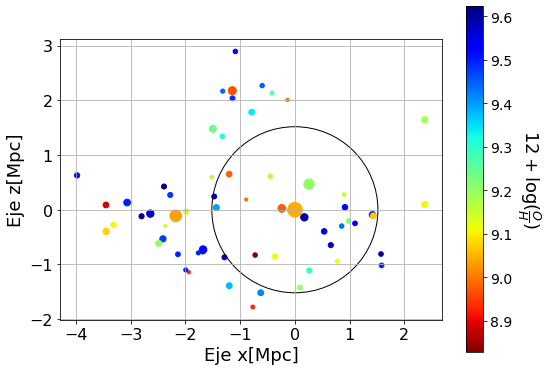

In [37]:
# Gráfico

# Etiquetas y ejes del grafico
fig,ax=plt.subplots(figsize=(8,6))

xlim=(xmin-0.1,xmax+0.1)
ylim=(ymin-0.1,ymax+0.1)

xlabel= 'Eje '+eje_1+'[Mpc]'
ylabel= 'Eje '+eje_2+'[Mpc]'

sizes = np.exp((np.log10(table['Stars_Mass'][mask])))/1000


ax.set_xlabel(xlabel,fontsize=18)
ax.set_ylabel(ylabel,fontsize=18)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=16)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

                        
# Scatter plot 'falso', para armar barra de referencia
sc_bar=ax.scatter(xvar,yvar,c=colors,vmin=vmin,vmax=vmax,cmap=cmap,s=0)
# Agrego barra de referencia para colres
cbar=fig.colorbar(mappable=sc_bar,ax=ax,orientation='vertical')
cbar.set_label(colors_var_label,fontsize=18,rotation=270,labelpad=30)
cbar.ax.tick_params(labelsize=14)

# scatter plot 'posta'
ax.scatter(xvar,yvar,marker='o',s=sizes,c=facecolor)

radius=table['Group_R_Crit200'][mask_Max]/1000

cc=plt.Circle((0,0),radius,fill=False)

ax.add_artist(cc)

plt.axis('scaled')#Escalea los ejes para que no se deforme el plano

plt.grid(True)

plt.savefig('scatter_posicionesxz_con_grad.png')
plt.show()

In [38]:
mask = (table['GroupID']==Group_Max)&(table['Stars_Mass']>=1e9)&(table['SF_Oxygen']>0)&(table['SF_Hydrogen']>0)&(table['SF_Mass']>0)
    
SF_O   = table['SF_Oxygen'][mask]
SF_H   = table['SF_Hydrogen'][mask]
SF_M   = table['SF_Mass'][mask]
M_C_200= table['Group_M_Crit200'][mask]

M_O_SF = SF_O*SF_M
M_H_SF = SF_H*SF_M

metal_var = 12 + np.log10(M_O_SF/(16*M_H_SF))

In [39]:
eje_1 = 'y'
eje_2 = 'z'
eje_3 = 'y'

In [40]:
xvar= table['CentreOfPotential_'+eje_1][mask]-y_max
yvar= table['CentreOfPotential_'+eje_2][mask]-z_max

In [41]:
xmin= min(xvar)
xmax= max(xvar)
ymin= min(yvar)
ymax= max(yvar)

In [42]:
# Colors representing some property  
# Define colormap to use
cmap = plt.get_cmap('jet_r')    # Add _r to the name of colormap to invert it.    
cmap.set_under('k')    # Color por debajo de mínimo

# Propiedad a usar para colorear
# Ojo!! Acá depende de la propiedad si tomar o no log10...
colors_var_key = metal_var
colors_var_label=r'$12+\log(\frac{O}{H})$'
colors_var = colors_var_key
                                   
#---------------------------------------------------------------
# Esto es en caso de que se tome log y la variable para colorear sea cero
# En estos casos, se asigna el color negro (con el 'set_under' del principio)
mask_color=~(np.logical_or(np.isinf(colors_var),np.isnan(colors_var)))
#---------------------------------------------------------------

# Escaleo los colores "a mano". Es una escala lineal.
vmin=min(colors_var[mask_color])
vmax=max(colors_var[mask_color])
a=1./float(vmax-vmin)
b=-a*vmin
colors=(a*colors_var+b)   # Array de números que representan colores
facecolor=cmap(colors)    # Esto transforma "números" a 4-tuplas que representan colores

<ipython-input-42-615c108029ff>:4: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))
  cmap.set_under('k')    # Color por debajo de mínimo


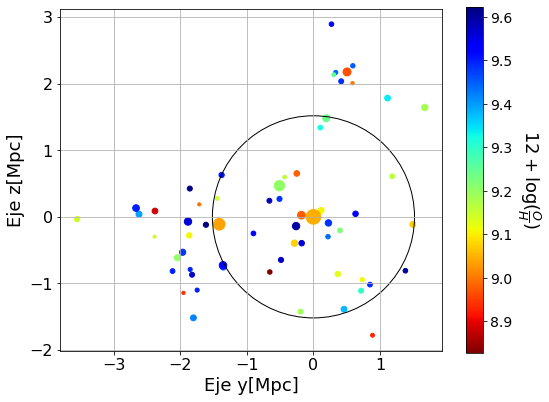

In [43]:
# Gráfico

# Etiquetas y ejes del grafico
fig,ax=plt.subplots(figsize=(8,6))

xlim=(xmin-0.1,xmax+0.1)
ylim=(ymin-0.1,ymax+0.1)

xlabel= 'Eje '+eje_1+'[Mpc]'
ylabel= 'Eje '+eje_2+'[Mpc]'

sizes = np.exp((np.log10(table['Stars_Mass'][mask])))/1000

ax.set_xlabel(xlabel,fontsize=18)
ax.set_ylabel(ylabel,fontsize=18)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=16)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

                        
# Scatter plot 'falso', para armar barra de referencia
sc_bar=ax.scatter(xvar,yvar,c=colors,vmin=vmin,vmax=vmax,cmap=cmap,s=0)
# Agrego barra de referencia para colres
cbar=fig.colorbar(mappable=sc_bar,ax=ax,orientation='vertical')
cbar.set_label(colors_var_label,fontsize=18,rotation=270,labelpad=30)
cbar.ax.tick_params(labelsize=14)

# scatter plot 'posta'
ax.scatter(xvar,yvar,marker='o',s=sizes,c=facecolor)

radius=table['Group_R_Crit200'][mask_Max]/1000

cc=plt.Circle((0,0),radius,fill=False)

ax.add_artist(cc)

plt.axis('scaled')#Escalea los ejes para que no se deforme el plano

plt.grid(True)

plt.savefig('scatter_posicioneszy_con_grad.png')
plt.show()

**Intento de los gráficos 3D superponiendo scatters con distintas propiedades. Primero para sf_oxygen=0**

In [52]:
eje_1 = 'x'
eje_2 = 'y'
eje_3 = 'z'

In [53]:
mask = (table['GroupID']==Group_Max)&(table['Stars_Mass']>=1e9)&(table['SF_Oxygen']>0)&(table['SF_Hydrogen']>0)&(table['SF_Mass']>0)

mask_null_O =(table['GroupID']==Group_Max)&(table['Stars_Mass']>=1e9)&(table['SF_Oxygen']==0)&(table['SF_Hydrogen']>0)&(table['SF_Mass']>0)
mask_null_H =(table['GroupID']==Group_Max)&(table['Stars_Mass']>=1e9)&(table['SF_Oxygen']>0)&(table['SF_Hydrogen']==0)&(table['SF_Mass']>0)

SF_O   = table['SF_Oxygen'][mask]
SF_H   = table['SF_Hydrogen'][mask]
SF_M   = table['SF_Mass'][mask]
M_C_200= table['Group_M_Crit200'][mask]

M_O_SF = SF_O*SF_M
M_H_SF = SF_H*SF_M

metal_var = 12 + np.log10(M_O_SF/(16*M_H_SF))

#size = 3**(np.log((table['Stars_Mass'][mask]))/np.log(max((table['Stars_Mass'][mask]))))
size   = np.exp((np.log10(table['Stars_Mass'][mask])))/10000
size_O = np.exp((np.log10(table['Stars_Mass'][mask_null_O])))/10000

sizemin = min(size)

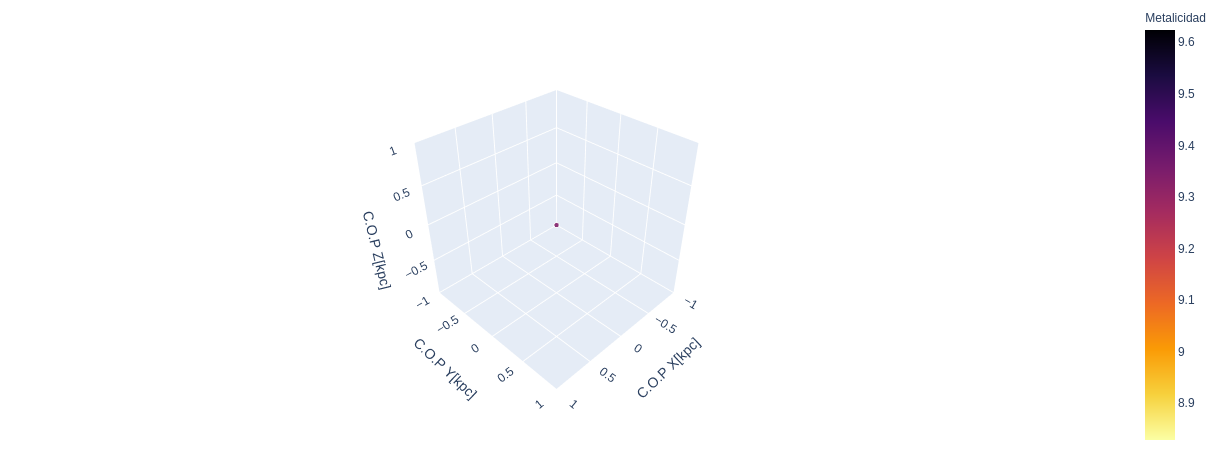

In [54]:
xvar= table['CentreOfPotential_x'][mask_Max]-x_max
yvar= table['CentreOfPotential_y'][mask_Max]-y_max
zvar= table['CentreOfPotential_z'][mask_Max]-z_max

xvar_O= table['CentreOfPotential_x'][mask_null_O]-x_max
yvar_O= table['CentreOfPotential_y'][mask_null_O]-y_max
zvar_O= table['CentreOfPotential_z'][mask_null_O]-z_max

cmin = min(metal_var)
cmax = max(metal_var)


fig = go.Figure(data=[go.Scatter3d(
    x=xvar,
    y=yvar,
    z=zvar,
    mode='markers',
    marker=dict(
        sizemin=sizemin,
        size=size,
        cauto=False,
        cmin=cmin,
        cmax=cmax,
        showscale=True,
        color=metal_var,        # set color to an array/list of desired values
        colorscale='inferno',   # choose a colorscale
        opacity=0.9,
        reversescale=True,
        colorbar=dict(title='Metalicidad')
    )
    ),go.Scatter3d(
        x=xvar_O,
        y=yvar_O,
        z=zvar_O,
        mode='markers',
        marker=dict(
        sizemin=sizemin,
        size=size_O,
        color='mediumslateblue',   # choose a colorscale
        opacity=0.9
    )
)])

# tight layout
fig.update_layout(scene = dict(
                    xaxis_title='C.O.P X[Mpc]',
                    yaxis_title='C.O.P Y[Mpc]',
                    zaxis_title='C.O.P Z[Mpc]'),
                    width=700,
                  margin =dict(l=0, r=0, b=0, t=0))

fig.show()


**Ahora para sf_Hydrogen=0**

In [44]:
eje_1 = 'x'
eje_2 = 'y'
eje_3 = 'z'

In [50]:
mask = (table['GroupID']==Group_Max)&(table['Stars_Mass']>=1e9)&(table['SF_Oxygen']>0)&(table['SF_Hydrogen']>0)&(table['SF_Mass']>0)

mask_null_O =(table['GroupID']==Group_Max)&(table['Stars_Mass']>=1e9)&(table['SF_Oxygen']==0)&(table['SF_Hydrogen']>0)&(table['SF_Mass']>0)
mask_null_H =(table['GroupID']==Group_Max)&(table['Stars_Mass']>=1e9)&(table['SF_Oxygen']>0)&(table['SF_Hydrogen']==0)&(table['SF_Mass']>0)

SF_O   = table['SF_Oxygen'][mask]
SF_H   = table['SF_Hydrogen'][mask]
SF_M   = table['SF_Mass'][mask]
M_C_200= table['Group_M_Crit200'][mask]

M_O_SF = SF_O*SF_M
M_H_SF = SF_H*SF_M

metal_var = 12 + np.log10(M_O_SF/(16*M_H_SF))

#size = 3**(np.log((table['Stars_Mass'][mask]))/np.log(max((table['Stars_Mass'][mask]))))
size   = np.exp((np.log10(table['Stars_Mass'][mask_Max])))/10000
size_H = np.exp((np.log10(table['Stars_Mass'][mask_null_H])))/10000

sizemin = min(size)

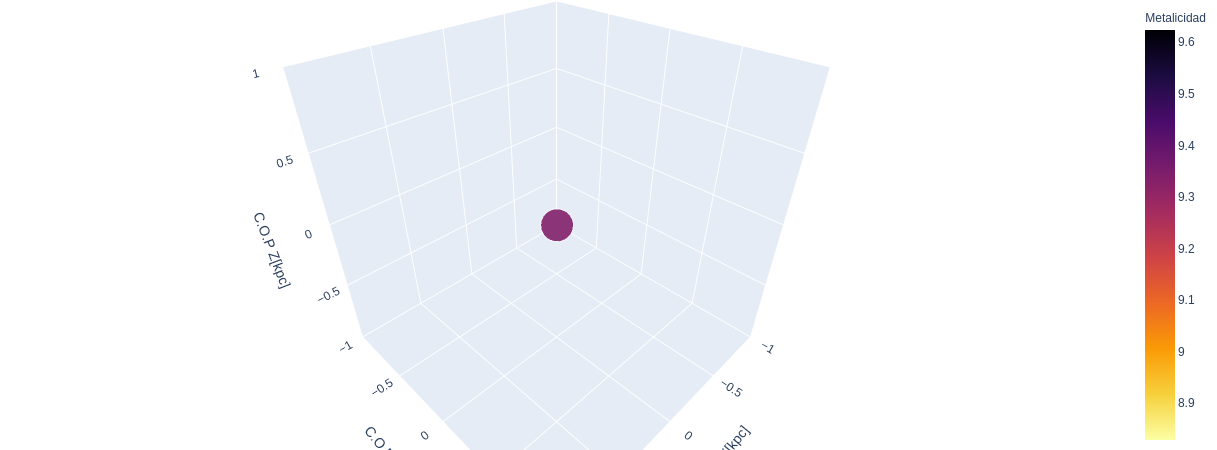

In [51]:
xvar= table['CentreOfPotential_x'][mask_Max]-x_max
yvar= table['CentreOfPotential_y'][mask_Max]-y_max
zvar= table['CentreOfPotential_z'][mask_Max]-z_max

xvar_H= table['CentreOfPotential_x'][mask_null_H]-x_max
yvar_H= table['CentreOfPotential_y'][mask_null_H]-y_max
zvar_H= table['CentreOfPotential_z'][mask_null_H]-z_max

cmin = min(metal_var)
cmax = max(metal_var)


fig = go.Figure(data=[go.Scatter3d(
    x=xvar,
    y=yvar,
    z=zvar,
    mode='markers',
    marker=dict(
        sizemin=sizemin,
        size=size,
        cauto=False,
        cmin=cmin,
        cmax=cmax,
        showscale=True,
        color=metal_var,        # set color to an array/list of desired values
        colorscale='inferno',   # choose a colorscale
        opacity=0.9,
        reversescale=True,
        colorbar=dict(title='Metalicidad')
    )
    ),go.Scatter3d(
        x=xvar_H,
        y=yvar_H,
        z=zvar_H,
        mode='markers',
        marker=dict(
        sizemin=sizemin,
        size=size_H,
        color='mediumslateblue',   # choose a colorscale
        opacity=0.9
    )
)])

# tight layout
fig.update_layout(scene = dict(
                    xaxis_title='C.O.P X[Mpc]',
                    yaxis_title='C.O.P Y[Mpc]',
                    zaxis_title='C.O.P Z[Mpc]'),
                    width=700,
                  margin =dict(l=0, r=0, b=0, t=0))

fig.show()


**No quedó ninguna galáxia que tuviese sf_H y no sf_O, o viceversa. Paso a graficar que tiene los dos valores de star forming igual a cero**

In [48]:
eje_1 = 'x'
eje_2 = 'y'
eje_3 = 'z'

In [72]:
mask = (table['GroupID']==Group_Max)&(table['Stars_Mass']>=1e9)&(table['SF_Oxygen']>0)&(table['SF_Hydrogen']>0)&(table['SF_Mass']>0)

mask_null_HO =(table['GroupID']==Group_Max)&(table['Stars_Mass']>=1e9)&(table['SF_Oxygen']==0)&(table['SF_Hydrogen']==0)&(table['SF_Mass']==0)

SF_O   = table['SF_Oxygen'][mask]
SF_H   = table['SF_Hydrogen'][mask]
SF_M   = table['SF_Mass'][mask]
M_C_200= table['Group_M_Crit200'][mask]

M_O_SF = SF_O*SF_M
M_H_SF = SF_H*SF_M

metal_var = 12 + np.log10(M_O_SF/(16*M_H_SF))

size    = 5*np.exp((table['Stars_Mass'][mask_Max]/table['Stars_Mass'][mask_Max]))
size_HO = 5*np.exp(((table['Stars_Mass'][mask_null_HO]/table['Stars_Mass'][mask_Max])))

sizemin = min(size_HO)

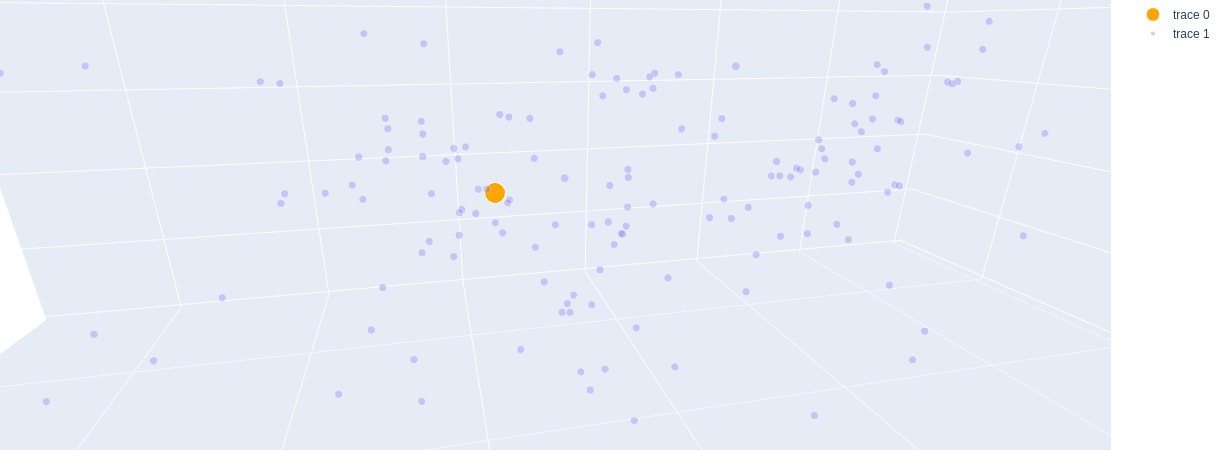

In [82]:
xvar   = table['CentreOfPotential_x'][mask_Max]-x_max
yvar   = table['CentreOfPotential_y'][mask_Max]-y_max
zvar   = table['CentreOfPotential_z'][mask_Max]-z_max

xvar_HO= table['CentreOfPotential_x'][mask_null_HO]-x_max
yvar_HO= table['CentreOfPotential_y'][mask_null_HO]-y_max
zvar_HO= table['CentreOfPotential_z'][mask_null_HO]-z_max

cmin = min(metal_var)
cmax = max(metal_var)


fig = go.Figure(data=[go.Scatter3d(
    x=xvar,
    y=yvar,
    z=zvar,
    mode='markers',
    marker=dict(
        sizemin=sizemin,
        size=size,
        color='orange',
        opacity=1
    )
    ),go.Scatter3d(
        x=xvar_HO,
        y=yvar_HO,
        z=zvar_HO,
        mode='markers',
        marker=dict(
        sizemin=sizemin,
        size = size_HO,
        color='mediumslateblue',   # choose a colorscale
        opacity=0.3
    )
)])

# tight layout
fig.update_layout(scene = dict(
                    xaxis_title='C.O.P X[Mpc]',
                    yaxis_title='C.O.P Y[Mpc]',
                    zaxis_title='C.O.P Z[Mpc]'),
                    width=700,
                  margin =dict(l=0, r=0, b=0, t=0))

fig.show()


NameError: name 'table' is not defined